__Description of Variables__:<br>
The dataset contains 6366 observations of 9 variables:<br>
- rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)<br>
- age: woman's age<br>
- yrs_married: number of years married<br>
- children: number of children<br>
- religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)<br>
- educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)
- occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
- occupation_husb: husband's occupation (same coding as above)
- affairs: time spent in extra-marital affairs

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
data = sm.datasets.fair.load_pandas().data
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [5]:
data['affair'] = (data.affairs > 0).astype('int')

In [6]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


we can see here that womwn who have affair, rate their marriage low as expected

In [8]:
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


As the rate_marriage declining, we can see age, yrs_married, children are correlated with each other

analysing some more features to check if there is any pattern matching with the women who might have affair

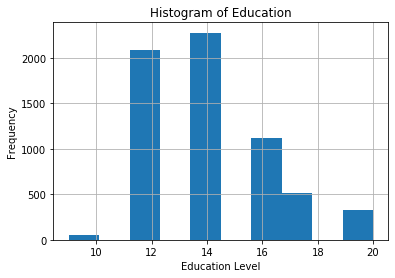

In [9]:
data.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()


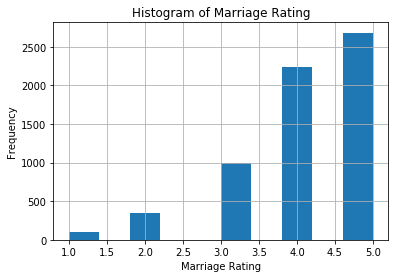

In [10]:
data.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
plt.show()

In [31]:
pd.crosstab(data.rate_marriage, data.affair.astype(bool))

affair,False,True
rate_marriage,,
1.0,25,74
2.0,127,221
3.0,446,547
4.0,1518,724
5.0,2197,487


Lets see marriage rating distribution of those who have affair vs who have not

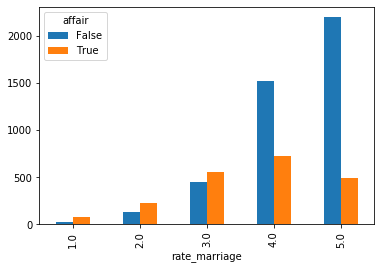

In [12]:
pd.crosstab(data.rate_marriage, data.affair.astype(bool)).plot(kind ='bar')
plt.show()

In [32]:
affair_marriage_rating.div(affair_marriage_rating.sum(axis=1).astype(float), axis=0)

affair,False,True
rate_marriage,,
1.0,0.252525,0.747475
2.0,0.364943,0.635057
3.0,0.449144,0.550856
4.0,0.677074,0.322926
5.0,0.818554,0.181446


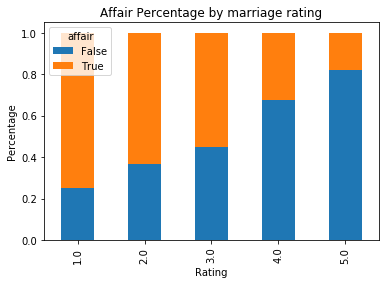

In [34]:
# Lets see the overall percentage

affair_marriage_rating = pd.crosstab(data.rate_marriage, data.affair.astype(bool))
affair_marriage_rating.div(affair_marriage_rating.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by marriage rating')
plt.xlabel('Rating')
plt.ylabel('Percentage')

plt.show()

Here we can see there are chances of affair for those who given full rating to their marriage but it is very less as compared with lower ratings, as we can expect that

In [35]:
affair_yrs_married.div(affair_yrs_married.sum(axis=1).astype(float), axis=0)

affair,False,True
yrs_married,,
0.5,0.956757,0.043243
2.5,0.784169,0.215831
6.0,0.660824,0.339176
9.0,0.578073,0.421927
13.0,0.588136,0.411864
16.5,0.548900,0.451100
23.0,0.574599,0.425401


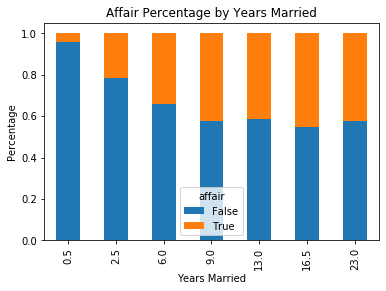

In [27]:
affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked= True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

plt.show()

Also here there is significant increase in percentage of affair after 3 years of marriage

Add an intercept column and create dummy variables for occupation and occupation_husb, since these are categorial variables. We can use here `dmatrices` function from `patsy` module, which will automatically create intercept as well as dummy variable and remove dummy variable trap as well.

In [36]:
y, X = dmatrices("affair ~ rate_marriage + age + yrs_married + children +  religious + educ + \
                    C(occupation) + C(occupation_husb)",data, return_type="dataframe")

In [37]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [38]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [39]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [40]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [62]:
# Let's create our model using logistic regression
model = LogisticRegression()
model.fit(X,y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
model.coef_

array([[ 1.48988379,  0.18804558,  0.49892627,  0.25064649,  0.83898295,
         0.83392124,  0.19054687,  0.29774459,  0.16131946,  0.18768302,
         0.19391685, -0.7031196 , -0.05841784,  0.10567682,  0.01691979,
        -0.37113489,  0.00401598]])

In [83]:
pd.DataFrame(model.coef_,columns = X.columns ).T.rename(columns= {0 : 'Coefficients'})

,Coefficients
Intercept,1.489884
occ_2,0.188046
occ_3,0.498926
occ_4,0.250646
occ_5,0.838983
occ_6,0.833921
occ_husb_2,0.190547
occ_husb_3,0.297745
occ_husb_4,0.161319
occ_husb_5,0.187683


In [63]:
model.score(X,y)  """.score() takes the input and output as arguments and returns the 
                        ratio of the number of correct predictions to the number of observations."""

0.7258875274897895

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y, model.predict(X))

array([[3891,  422],
       [1323,  730]], dtype=int64)

In [73]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      4313
         1.0       0.63      0.36      0.46      2053

    accuracy                           0.73      6366
   macro avg       0.69      0.63      0.64      6366
weighted avg       0.71      0.73      0.70      6366



Let's Evaluate our model using validation set and split our data into train and test set

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =0)

In [90]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
#Predict with test set
pred = model2.predict(X_test)


In [101]:
pred

array([1., 0., 0., ..., 0., 0., 0.])

In [97]:
pd.DataFrame(model2.predict_proba(X_test),columns = [False, True])

,False,True
0,0.351463,0.648537
1,0.909551,0.090449
2,0.725673,0.274327
3,0.743884,0.256116
4,0.747346,0.252654
...,...,...
1905,0.856897,0.143103
1906,0.787705,0.212295
1907,0.557274,0.442726
1908,0.812070,0.187930


In [110]:
print(metrics.accuracy_score(y_test, pred))

0.7298429319371728


The accuracy is same as we saw when training and predicting on the same data

In [109]:
print(metrics.confusion_matrix(y_test, pred))

[[1169  134]
 [ 382  225]]


In [108]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



Now let's use the cross validation method to achieve some more accuracy

In [114]:
scores = cross_val_score(LogisticRegression(), X,y, scoring = 'accuracy', cv =10 ,n_jobs = -1)
print(scores)
print(scores.mean())

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


After evaluating using cross validation still getting 73% acuuracy. Now our model is ready to predict and deployment.